In [6]:
import matplotlib
import matplotlib.pyplot as plt
import pandas_datareader as pdr

API: str = 'yahoo'
START_DATE: str = '2020-12-01'

df_aapl = pdr.data.DataReader('AAPL', API, START_DATE)
df_gold = pdr.data.DataReader('GLD', API, START_DATE)
df_spc =  pdr.data.DataReader('^GSPC', API, START_DATE)
df_n225 =  pdr.data.DataReader('^N225', API, START_DATE)

df_gold.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-12-06,165.539993,164.449997,165.199997,164.839996,3597800,164.839996
2022-12-07,166.639999,165.320007,165.470001,166.330002,4610700,166.330002
2022-12-08,167.050003,166.070007,166.580002,166.470001,3217900,166.470001
2022-12-09,168.089996,166.600006,167.259995,167.059998,5430400,167.059998
2022-12-12,166.580002,165.438004,166.438004,165.679993,3476247,165.679993


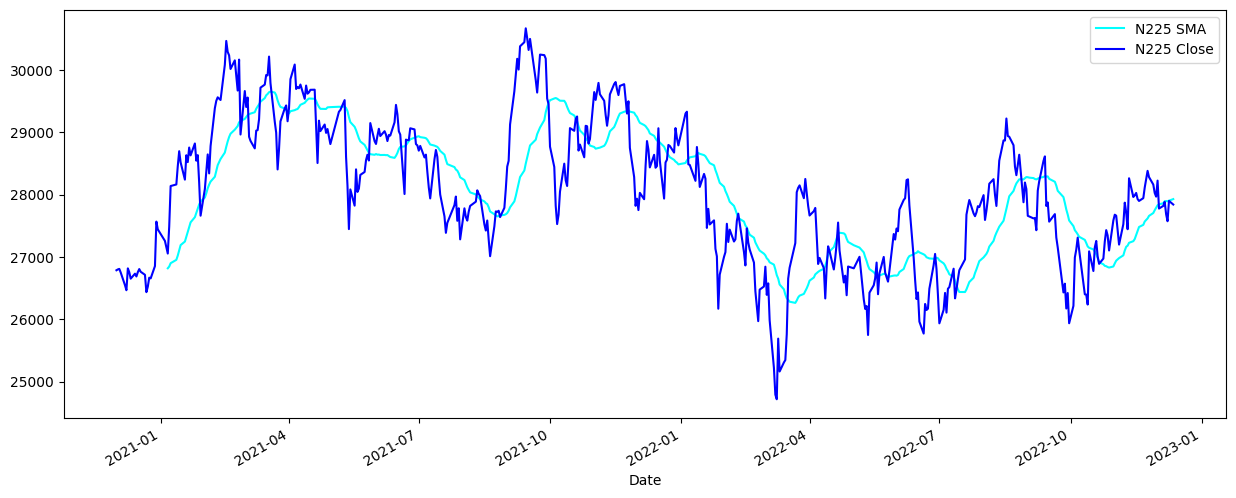

In [14]:
"""Data analysis
"""
# Simple moving average
df_n225['SMA'] = df_n225['Close'].rolling(window=25).mean()
df_n225['SMA'].plot(figsize=(15,6), color='cyan', label='N225 SMA')

# Closing price
df_n225['Close'].plot(figsize=(15,6), color='blue', label='N225 Close')

plt.legend()
plt.show()

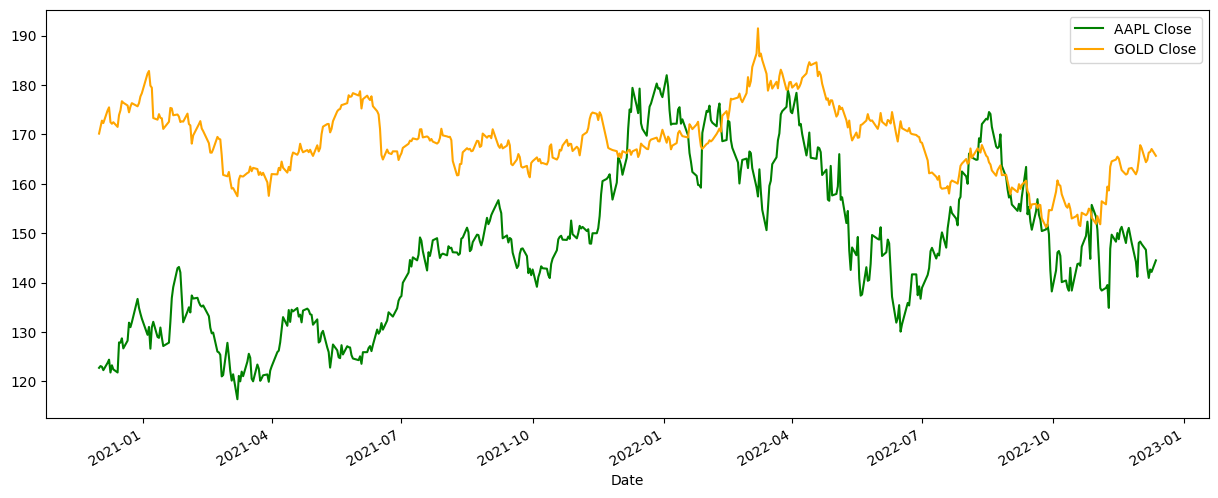

In [13]:
# Attempt data mining from closing price correlations.
df_aapl['Close'].plot(figsize=(15,6), color='green', label='AAPL Close')
df_gold['Close'].plot(figsize=(15,6), color='orange', label='GOLD Close')
plt.legend()
plt.show()

In [15]:
def daily_price_change(df):
    """Return Daily stock price change.
    """
    return ((df['Close'] - df['Open']) / df['Open']) * 100


df_aapl['changing'] = daily_price_change(df_aapl)
df_gold['changing'] = daily_price_change(df_gold)
df_spc['changing'] = daily_price_change(df_spc)
df_n225['changing'] = daily_price_change(df_n225)

df_gold.tail(3).round(2)

,High,Low,Open,Close,Volume,Adj Close,changing
Date,,,,,,,
2022-12-08,167.05,166.07,166.58,166.47,3217900,166.47,-0.07
2022-12-09,168.09,166.60,167.26,167.06,5430400,167.06,-0.12
2022-12-12,166.58,165.44,166.44,165.68,3476247,165.68,-0.46


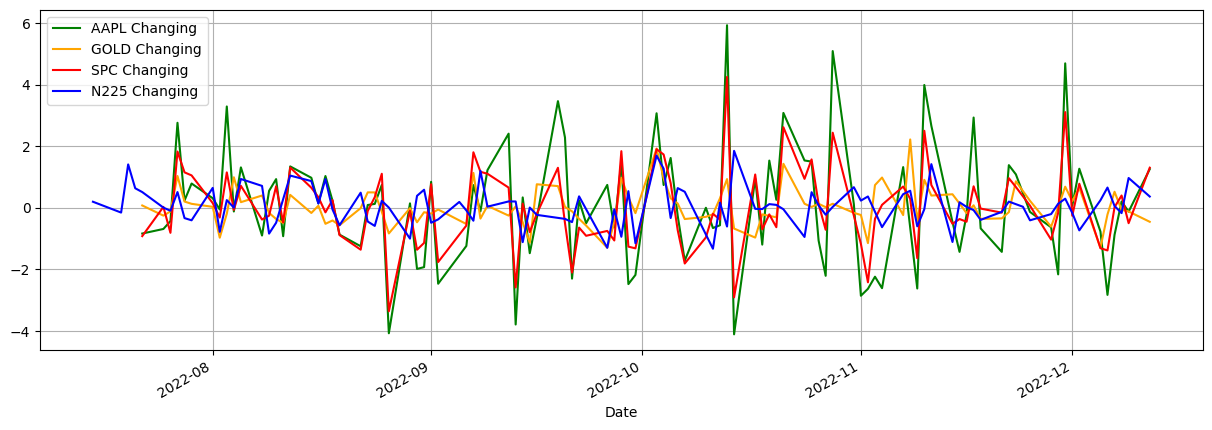

In [17]:
# Show when and what changes are made.
df_aapl['changing'].tail(100).plot(grid=True, figsize=(15,5), color='green', label='AAPL Changing')
df_gold['changing'].tail(100).plot(grid=True, figsize=(15,5), color='orange', label='GOLD Changing')
df_spc['changing'].tail(100).plot(grid=True, figsize=(15,5), color='red', label='SPC Changing')
df_n225['changing'].tail(100).plot(grid=True, figsize=(15,5), color='blue', label='N225 Changing')
plt.legend()
plt.show()